## Lab | Customer Analysis Round 2

In [ ]:
# # For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

# Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

# Dealing with the data
# Show the dataframe shape.
# Standardize header names.
# Which columns are numerical?
# Which columns are categorical?
# Check and deal with NaN values.
# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
# BONUS: Put all the previously mentioned data transformations into a function.

In [229]:
import pandas as pd
import numpy as np

In [230]:
df=pd.read_csv("./marketing_customer_analysis.csv")

In [231]:
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [232]:
df.shape

(10910, 26)

In [233]:
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [234]:
df.tail()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,...,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


In [235]:
df.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [236]:
df=df.drop(df.columns[0], axis=1)
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [237]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [238]:
df.columns=df.columns[:].str.lower()

In [239]:
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [240]:
df=df.rename(columns={'customer lifetime value':'customer_lifetime_value',
       'effective to date':'effective_to_date','employmentstatus':'employment_status', 
       'location code':"location_code", 'marital status':"'marital_status'", 'monthly premium auto':'monthly_premium_auto',
       'months since last claim':'months_since_last_claim', 'months since policy inception':'months_since_policy_inception',
       'number of open complaints':'number_of_open_complaints', 'number of policies':'number_of_policies', 'policy type':'policy_type',
        'renew offer type':'renew_offer_type', 'sales channel':'sales_channel', 'total claim amount':'total_claim_amount',
       'vehicle class':'vehicle_class', 'vehicle size':'vehicle_size', 'vehicle type':'vehicle_type'})

df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


#Data Type

In [241]:
df.select_dtypes(['int32','float64'])

,customer_lifetime_value,months_since_last_claim,number_of_open_complaints,total_claim_amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [242]:
df.select_dtypes(['object'])

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,'marital_status',policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [243]:
# data types

df._get_numeric_data()



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [244]:
df.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,'marital_status',policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [245]:
df.isna()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
10906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10908,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [246]:
#number of null value
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
'marital_status'                    0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [247]:
#percentage of null_value
percentage_missing_value = (df.isnull().sum() / len(df)) * 100
percentage_missing_value


customer                          0.000000
state                             5.783685
customer_lifetime_value           0.000000
response                          5.783685
coverage                          0.000000
education                         0.000000
effective_to_date                 0.000000
employment_status                 0.000000
gender                            0.000000
income                            0.000000
location_code                     0.000000
'marital_status'                  0.000000
monthly_premium_auto              0.000000
months_since_last_claim           5.802016
months_since_policy_inception     0.000000
number_of_open_complaints         5.802016
number_of_policies                0.000000
policy_type                       0.000000
policy                            0.000000
renew_offer_type                  0.000000
sales_channel                     0.000000
total_claim_amount                0.000000
vehicle_class                     5.701192
vehicle_siz

In [248]:
# because of the number of values of vehicle_type is high so i decided to drop this column
df = df.drop(['vehicle_type'], axis=1)

In [249]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [254]:
# deal with null value of months_since_last_claim
#df['months_since_last_claim'].unique()
df['months_since_last_claim']=df['months_since_last_claim'].fillna(0)
display(df['months_since_last_claim'].unique())

array([ 7.,  3., 34., 10.,  0.,  2.,  8., 35., 33., 19., 13.,  5., 24.,
       25.,  6., 20., 26., 14.,  9., 29., 11.,  1., 18., 16., 30., 12.,
        4., 22., 31., 21., 28., 17., 15., 32., 23., 27.])

In [255]:
# deal with null value of 'number_of_open_complaints
df['number_of_open_complaints'].unique()

array([ 0., nan,  3.,  1.,  2.,  4.,  5.])

In [272]:
df['number_of_open_complaints'].value_counts()

0.0    8793
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number_of_open_complaints, dtype: int64

In [261]:
df['number_of_open_complaints']=df['number_of_open_complaints'].fillna(0)
display(df['number_of_open_complaints'].unique())

array([0., 3., 1., 2., 4., 5.])

In [270]:
#deal with nan values columns vehicle class,size
df['vehicle_size'].unique()
df['vehicle_size']=df['vehicle_size'].fillna('unknown')
display(df['vehicle_size'].unique())


array(['Medsize', 'Small', 'Large', 'unknown'], dtype=object)

In [271]:
df['vehicle_size'].value_counts()

Medsize    7251
Small      1966
Large      1071
unknown     622
Name: vehicle_size, dtype: int64

In [279]:
df['vehicle_class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

In [284]:
df['vehicle_class']=df['vehicle_class'].fillna("unknown")
display(df['vehicle_class'].unique())

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', 'unknown'], dtype=object)

In [285]:
#Dealing with null value of response
df['vehicle_class'].value_counts()

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
unknown           622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [293]:
df['response'].unique()
df['response']=df['response'].fillna('No')
display(df['response'].unique())


array(['No', 'Yes'], dtype=object)

In [294]:
df['response'].value_counts()

No     9444
Yes    1466
Name: response, dtype: int64

In [299]:
#dealing with null value state  
df['state'].unique()
df['state'].value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [303]:
df['state']=df['state'].fillna("California ")
df['state'].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', 'California ',
       'Nevada'], dtype=object)

In [304]:
# cheking miss values
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
'marital_status'                 0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
month_column                     0
dtype: int64

In [286]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [287]:
import time
from datetime import date

In [288]:
df['month_column'] = df['effective_to_date'].dt.month
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month_column
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [289]:
first_quarter = [1, 2, 3]  # month values for the first quarter
df_first_quarter = df[df['effective_to_date'].dt.month.isin(first_quarter)]
df_first_quarter

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month_column
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


## Lab | Customer Analysis Round 3

In [159]:
# EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
# Show DataFrame info.
# Describe DataFrame.
# Show a plot of the total number of responses.
# Show a plot of the response rate by the sales channel.
# Show a plot of the response rate by the total claim amount.
# Show a plot of the response rate by income.

In [160]:
df.info

<bound method DataFrame.info of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      education effective_to_date employment_status gender  income  ...  \
0   

In [161]:
df.describe()

#df.describe().T


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month_column
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [319]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [324]:
df['response_rate']=np.where(df['response'] =='No', 0 , 1)
df


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month_column,response_rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1,0
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1,0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2,0
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2,0


In [330]:
df['response_rate'].value_counts()


0    9444
1    1466
Name: response_rate, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

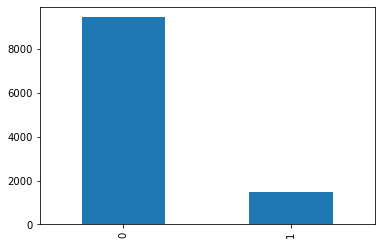

In [335]:
#plot response_rate
df.response_rate.value_counts().plot.bar()
plt.show

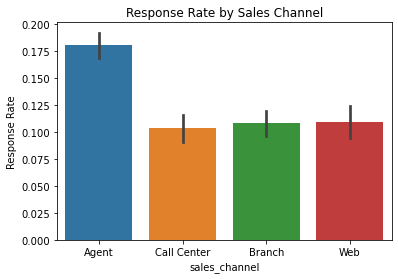

In [329]:
#plot response rate by sales_channel
sns.barplot(x='sales_channel', y='response_rate', data=df)
plt.title('Response Rate by Sales Channel')
plt.ylabel('Response Rate')
plt.show()

In [336]:
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

SyntaxError: invalid syntax (Temp/ipykernel_15224/3495431026.py, line 1)

In [339]:
#Show a plot of the response rate by the total claim amount.
df['total_claim_amount'].unique()

array([292.8     , 744.924331, 480.      , ..., 273.018929, 381.306996,
       618.288849])

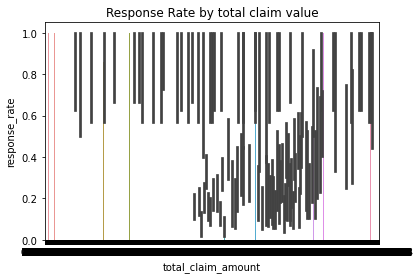

In [341]:
#plot response rate by total claim amount
sns.barplot(x='total_claim_amount', y='response_rate', data=df)
plt.title('Response Rate by total claim value')
plt.ylabel('response_rate')
plt.show()

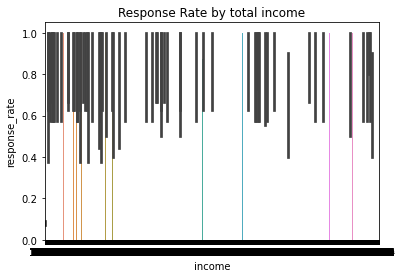

In [342]:
sns.barplot(x='income', y='response_rate', data=df)
plt.title('Response Rate by total income')
plt.ylabel('response_rate')
plt.show()